# Exercise

Consider the following function (where $\mathbf{x} = (x, y)$):

$$
f(\mathbf{x}) = (x + 2y - 7)^2 + (2x + y - 5)^2.
\tag{1}
$$

1. **Plot the function.**


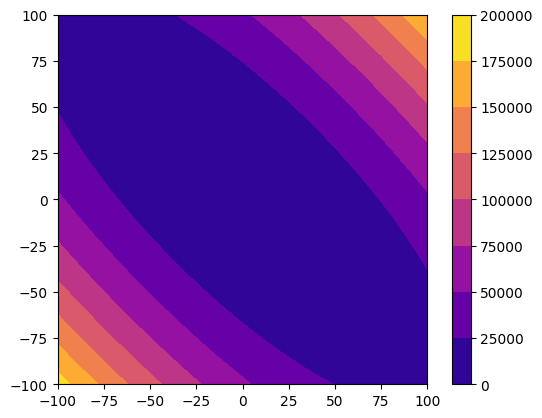

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

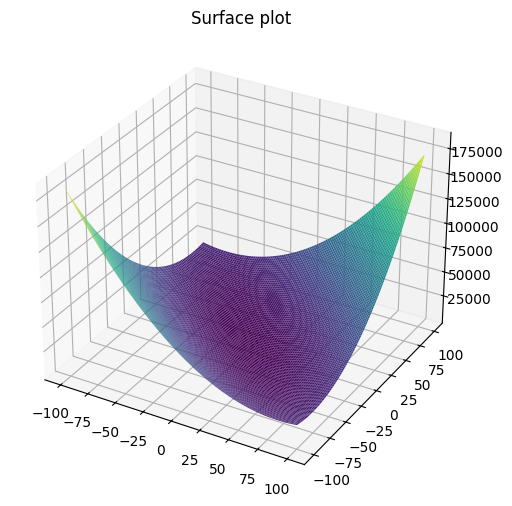

In [4]:
#Consider the following function (where x = (x, y))
#f(x) = (x + 2y − 7)2 + (2x + y − 5)2
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    x, y = x
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# plot the plane 
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x, y)
Z = f((X, Y))

fig= plt.figure()
plt.contourf(X, Y, Z, cmap='plasma')
plt.axis('scaled')
plt.colorbar()
plt.show()
plt.figure(figsize=(8, 6))

fig= plt.figure()
plt.figure(figsize=(8, 6))
# use 3d plot
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()


2. Compute analytically the value $\mathbf{x}_{\min}$ where the function attains its minimum value and $f(\mathbf{x}_{\min})$.




## Analytical Solution

The given function is:
$$
f(x, y) = (x + 2y - 7)^2 + (2x + y - 5)^2
$$

1. **Gradient of \(f(x, y)\):**
   $$
   \frac{\partial f}{\partial x} = 10x + 8y - 34
   $$
   $$
   \frac{\partial f}{\partial y} = 8x + 10y - 38
   $$

2. **Set the gradient to zero:**
   $$
   10x + 8y - 34 = 0 \quad \text{and} \quad 8x + 10y - 38 = 0
   $$

3. **Solve the system of equations:**
   $$
   x = 1, \quad y = 3
   $$

4. **Minimum Value of \(f(x, y)\):**
   Substituting \(x = 1\) and \(y = 3\) into \(f(x, y)\):
   $$
   f(1, 3) = 0
   $$

### **Final Answer**
- The function attains its minimum value at:
  $$
  \mathbf{x}_{\min} = (1, 3)
  $$
- The minimum value is:
  $$
  f(\mathbf{x}_{\min}) = 0
  $$


In [5]:
# Noted that f is a quadratic function and from the previous visualization we know that it is convex, we know that:
# - the function will have a single stationary point that is it's minima. 
# - the stationary point can be found by solving the equation grad(f) = (0,0)

import jax
import jax.numpy as jnp
import sympy as sym

sx = sym.Symbol('sx')
sy = sym.Symbol('sy')
sf = (sx + 2*sy -7)**2 + (2*sx+sy-5)**2
sgrad = sym.Matrix([[sym.diff(sf, sx), sym.diff(sf, sy)]])
s0 = sym.Matrix([0, 0])
x1 = sym.solve(sgrad[0], sx, 0, dict=True)
x2 = sym.solve(sgrad[1], sx, 0, dict=True)

ymin = sym.solve(x1[0][sx] - x2[0][sx], sy, 0, dict=True)[0][sy]
xmin = x1[0][sx].subs('sy',ymin)

print(sgrad.subs('sx',xmin).subs('sy',ymin) == sym.Matrix([[0,0]]))

True


In [6]:
fmin = f([xmin,ymin])
Xmin = [xmin,ymin]
print('Minimum is in:', Xmin, ' with value:', fmin)

Minimum is in: [1, 3]  with value: 0


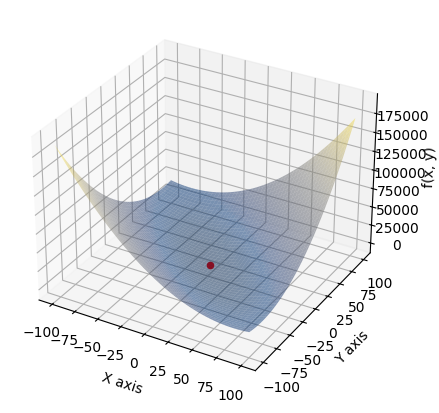

In [7]:
fig = plt.figure(figsize=(5,5))

axs = fig.add_subplot(1, 1, 1, projection='3d')
axs.plot_surface(X, Y, Z, cmap = plt.cm.cividis, alpha=0.5)
axs.set_xlabel('X axis')
axs.set_ylabel('Y axis')
axs.set_zlabel('f(x, y)')
axs.scatter(xmin, ymin, fmin, color='red')
plt.show()

3. **Implement the gradient descent (GD) method**:

   $$
   \mathbf{x}^{k+1} = \mathbf{x}^k - \alpha \nabla f(\mathbf{x}^k),
   \tag{2}
   $$
   where $\alpha$ is the learning rate. Use the stopping criterion $E < \epsilon$ where $E$ is the absolute value of the difference of the last two functional values, i.e.,

   $$
   E = |f(\mathbf{x}^{k+1}) - f(\mathbf{x}^k)|,
   \tag{3}
   $$

   and $\epsilon$ is the required tolerance. Moreover, set the maximum number of iterations to 200.



In [13]:
def gradient_descent(grad_func, x, lr=0.01, eps=1e-6, max_iter=200):
    x = x
    path = [x]  # for visualization purposes only
    for _ in range(max_iter):
        grad_val = grad_func(x)
        prev_x = x
        x = x - lr * grad_val
        path.append(x)
        if jnp.linalg.norm(f(x) - f(prev_x)) < eps:
            break
    return x, path

# Define the gradient of the function (manual computation)
def grad_func(X):
    x, y = X
    df_dx = 2 * (x + 2 * y - 7) + 4 * (2 * x + y - 5)
    df_dy = 4 * (x + 2 * y - 7) + 2 * (2 * x + y - 5)
    grad = np.array([df_dx, df_dy])
    return grad


4. Apply the GD method with $\epsilon = 10^{-3}$, $\alpha = 0.01$ and $0.1$. Plot the convergence history and comment on the results.


In [27]:
eps = 1e-3
alphas = [0.01, 0.1]
np.random.seed(0)
x = np.random.randn(2)* 10
histories = {}
for alpha in alphas:
    solution, path = gradient_descent(grad_func, x, lr=alpha, eps=eps)
    histories[alpha] = path
    print(f"Alpha = {alpha}, Solution = {solution}")


Alpha = 0.01, Solution = [1.13752852 2.86247148]
Alpha = 0.1, Solution = [0.99900809 2.98352002]


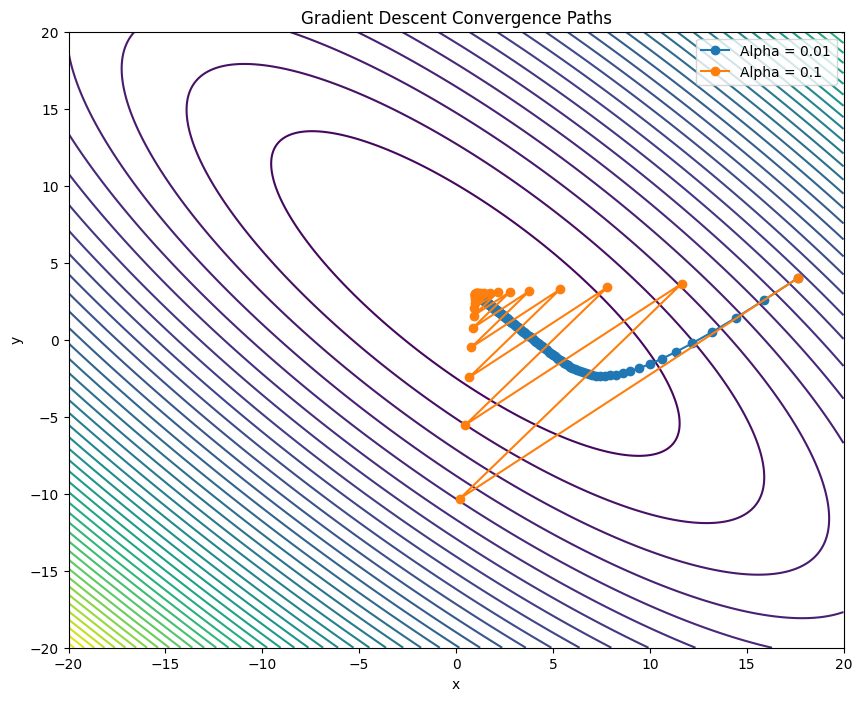

In [29]:
# Visualization of Convergence Histories
plt.figure(figsize=(10, 8))
x = np.linspace(-20, 20, 500)
y = np.linspace(-20, 20, 500)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

# Plot the function
plt.contour(X, Y, Z, levels=50, cmap='viridis')

# Plot paths for different learning rates
for alpha, path in histories.items():
    x_vals = [p[0] for p in path]  # Extract x values
    y_vals = [p[1] for p in path]  # Extract y values
    plt.plot(x_vals, y_vals, marker='o', label=f"Alpha = {alpha}")
plt.title("Gradient Descent Convergence Paths")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

5. **Implement the GD with momentum (GDM)**, i.e.,

   $$
   \mathbf{z}^{k+1} = \beta \mathbf{z}^k + \nabla f(\mathbf{x}^k),
   \tag{4}
   $$
   $$
   \mathbf{x}^{k+1} = \mathbf{x}^k - \alpha \mathbf{z}^{k+1},
   \tag{5}
   $$

   where $\alpha$ is the learning rate and $\beta$ is the momentum coefficient. Use the same stopping criterion used in the GD method.

In [31]:
def gradient_descent_with_momentum(grad_func, x, lr=0.01, beta = 0.9, eps=1e-6, max_iter=200):
    x = x
    path = [x]  # for visualization purposes only
    velocity = [0.0 in range(len(x))]
    for _ in range(max_iter):
        grad_val = grad_func(x)
        prev_x = x
        velocity = beta*x + grad_val
        x = x - lr * velocity
        path.append(x)
        if jnp.linalg.norm(f(x) - f(prev_x)) < eps:
            break
    return x, path

# Define the gradient of the function (manual computation)
def grad_func(X):
    x, y = X
    df_dx = 2 * (x + 2 * y - 7) + 4 * (2 * x + y - 5)
    df_dy = 4 * (x + 2 * y - 7) + 2 * (2 * x + y - 5)
    grad = np.array([df_dx, df_dy])
    return grad


6. Apply the GDM method with $\epsilon = 10^{-3}$, $\alpha = 0.01$, and $\beta = 0.5, 0.9$. Plot the convergence history and comment on the results.

In [38]:
eps = 1e-3
alpha = 0.01
betas = [0.5, 0.9]
np.random.seed(0)
x = np.random.randn(2)* 10
histories = {}
for beta in betas:
    solution, path = gradient_descent_with_momentum(grad_func, x, lr=alpha, beta=beta, eps=eps)
    histories[beta] = path
    print(f"Beta = {beta}, Solution = {solution}")


Beta = 0.5, Solution = [1.19412389 2.69776801]
Beta = 0.9, Solution = [1.2400022  2.56952161]


In [37]:
for beta, path in histories.items():
    for p in path:
        print(p[0])
    x_vals = [p[0] for p in path]

17.64052345967664
15.808142729716813
14.284274532047547
13.012605995763886
11.947223082389074
11.050687278092564
10.292468085942271
9.647665495482363
9.095968784121553
8.620807929229906
8.208661998238943
7.848495476083394
7.531298861838655
7.249714245008426
6.997730140476541
6.770432769513188
6.563803344552435
6.374552847274441
6.1999873639562715
6.037898325216273
5.8864730430533765
5.744221790390563
5.609918362962818
5.482551629514344
5.361286037661346
5.245429418810974
5.134406741994996
5.027738716248373
4.925024344726814
4.8259266996621335
4.7301613224666745
4.637486763496325
4.54769686579334
4.460614470326812
4.37608627990396
4.293978667544645
4.214174254736231
4.13656911728019
4.061070502761762
3.9875949651247833
3.916066839316297
3.8464169932138907
3.778581805661152
3.712502328900874
3.6481236014090714
3.585394083419381
3.5242651925510087
3.4646909211291796
3.4066275201903866
3.3500332379385176
3.2948681026786604
3.241093742097908
3.1886732322642244
3.1375709709384116
3.087752570

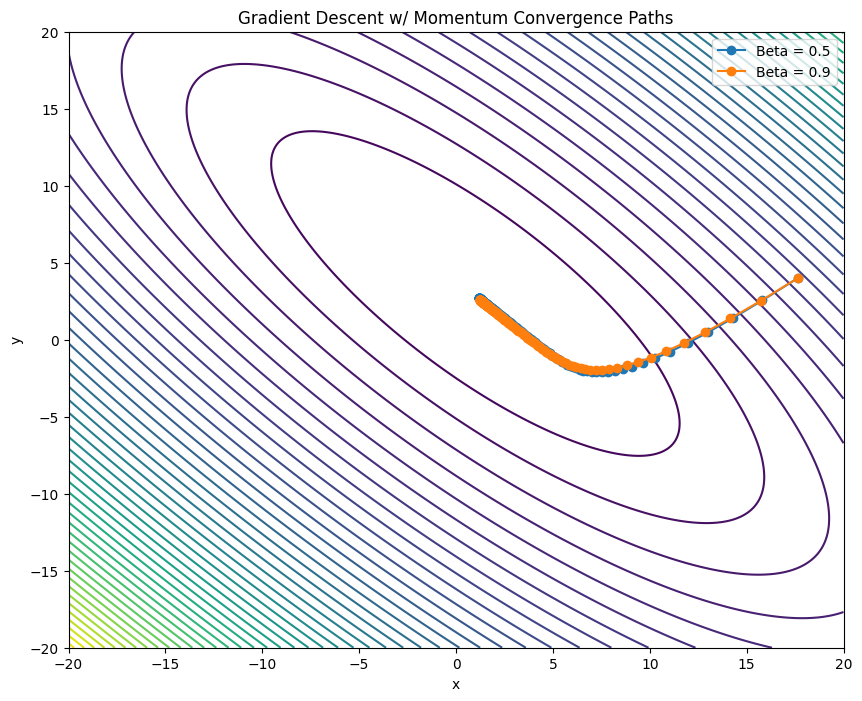

In [33]:
# Visualization of Convergence Histories
plt.figure(figsize=(10, 8))
x = np.linspace(-20, 20, 500)
y = np.linspace(-20, 20, 500)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

# Plot the function
plt.contour(X, Y, Z, levels=50, cmap='viridis')

# Plot paths for different learning rates
for beta, path in histories.items():
    x_vals = [p[0] for p in path]  # Extract x values
    y_vals = [p[1] for p in path]  # Extract y values
    plt.plot(x_vals, y_vals, marker='o', label=f"Beta = {beta}")
plt.title("Gradient Descent w/ Momentum Convergence Paths")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()